# News Categories Classification Project

### Step 1: Loading Data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import os
from pathlib import Path

In [2]:
path = Path('../data/raw')
print(type(path))

<class 'pathlib.WindowsPath'>


In [3]:
df = pd.read_csv(
    path/"news-categories.csv", 
    encoding = "ISO-8859-1"
)

In [4]:
df.head(3)

,News,Category
0,The IMF now expects China's economy to grow by...,Economy
1,Manufacturing activity in the Eurozone has dec...,Economy
2,Continued disruptions in the global supply cha...,Economy


### Step 2: Exploratory Data Analysis

There are 252 observations in this dataset. 

In [5]:
df.shape

(252, 2)

All features in this dataset are non-numeric.

In [6]:
df.dtypes

News        object
Category    object
dtype: object

There are 8 unique categories for each news title. 

In [7]:
df.describe()

,News,Category
count,252,252
unique,252,8
top,The IMF now expects China's economy to grow by...,Entertainment
freq,1,39


There are no null values in this dataset. 

In [8]:
df.isna().sum()

News        0
Category    0
dtype: int64

The 8 unique categories are: 

- Artifical Intelligence
- Economy
- Entertainment
- Food
- Health
- International Relations
- Politics
- Sports

In [9]:
category = set(df.Category)
category

{'Artificial Intelligence ',
 'Economy',
 'Entertainment',
 'Food',
 'Health',
 'International relations',
 'Politics',
 'Sports'}

In [10]:
counts = df.Category.value_counts(dropna=False)
counts

Category
Entertainment               39
Food                        36
Economy                     35
Sports                      32
International relations     32
Health                      27
Artificial Intelligence     27
Politics                    24
Name: count, dtype: int64

<Axes: title={'center': 'Items Per Category'}, xlabel='Category', ylabel='Count'>

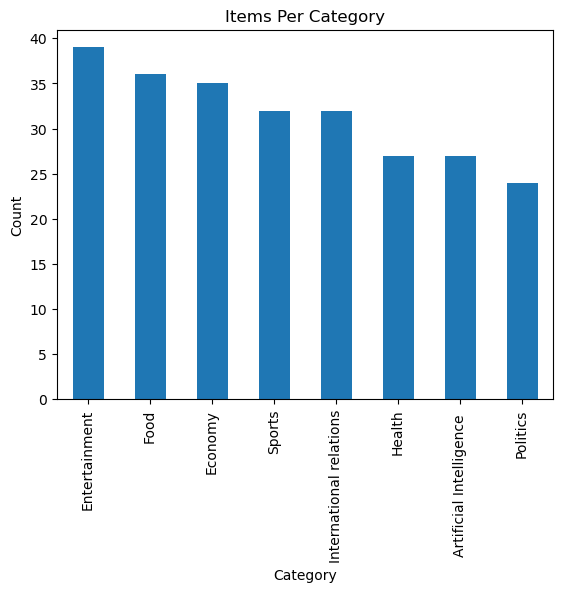

In [11]:
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Items Per Category')
counts.plot(kind="bar")

In [12]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
# Create a text corpus:
text = "".join([title for title in df.News])

In [14]:
# Create a frequency dictionary:    
words = {token:text.split().count(token) for token in set(text.split())}


In [15]:
# Sort in decending order and extract top 30:
top30 = dict(sorted(words.items(), key = lambda x: x[1], reverse = True)[:30])

C:\Users\katle\AppData\Local\Temp\ipykernel_23208\1655195070.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top30.keys(), rotation=45)


Text(0.5, 1.0, 'Frequency plot for words. ')

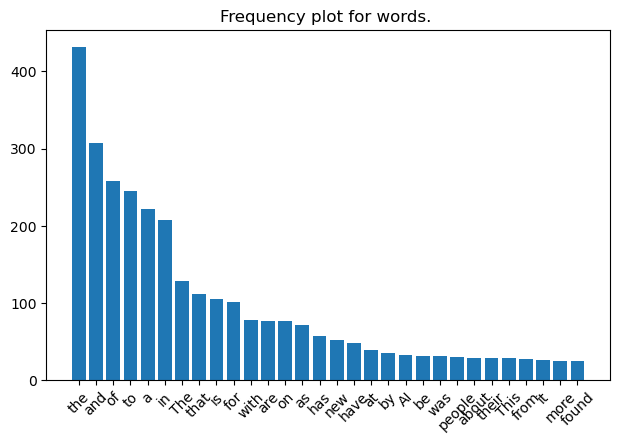

In [16]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 2)
fig = plt.figure(figsize=(16, 10))

# Create the frequency barplot: 
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(top30.keys(), top30.values())
ax1.set_xticklabels(top30.keys(), rotation=45)
ax1.set_title('Frequency plot for words. ')

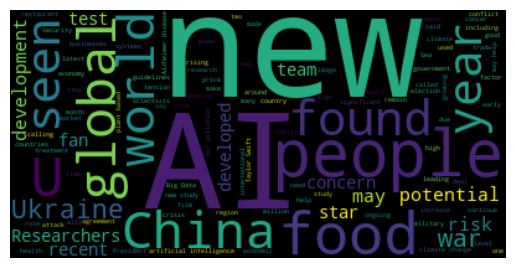

In [17]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Step 3: Preprocessing

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


In [19]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer

# Remove stopwords and tokenize
def preprocess(words, token_type):
    words = word_tokenize(words)
    nonstop_words = [word for word in words if word not in stop_words]

    if token_type == "lemm":
        lemmatizer = WordNetLemmatizer()
        def get_wordnet_pos(word):
            tag = nltk.pos_tag([word])[0][1][0].upper()
            tag_dict = {"J": wordnet.ADJ,
                        "N": wordnet.NOUN,
                        "V": wordnet.VERB,
                        "R": wordnet.ADV}
            return tag_dict.get(tag, wordnet.NOUN)
        lemmas = [
            lemmatizer.lemmatize(token, get_wordnet_pos(token)) 
            for token in nonstop_words
            ]
        return " ".join(lemmas)
    
    elif token_type == "stem":
        # Initialize the Porter Stemmer:
        stemmer = PorterStemmer()
        stems =  [stemmer.stem(word) for word in words]
        return " ".join(stems)
    


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\katle\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df["Stemmed_News"] = df["News"].apply(preprocess, token_type="stem")
df["Lemmatized_News"] = df["News"].apply(preprocess, token_type="stem")

In [21]:
df.head(3)

,News,Category,Stemmed_News,Lemmatized_News
0,The IMF now expects China's economy to grow by...,Economy,the imf now expect china 's economi to grow by...,the imf now expect china 's economi to grow by...
1,Manufacturing activity in the Eurozone has dec...,Economy,"manufactur activ in the eurozon ha declin , an...","manufactur activ in the eurozon ha declin , an..."
2,Continued disruptions in the global supply cha...,Economy,"continu disrupt in the global suppli chain , i...","continu disrupt in the global suppli chain , i..."


## Step 4: Feature Engineering

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
stem_x = df["Stemmed_News"]
lemm_x = df["Lemmatized_News"]

In [24]:
y = df["Category"]

In [25]:
(stem_x_train, stem_x_test, 
stem_y_train, stem_y_test) = train_test_split(
    stem_x, y, test_size=0.33, random_state=42
)

In [26]:
(lemm_x_train, lemm_x_test, 
lemm_y_train, lemm_y_test) = train_test_split(
    lemm_x, y, test_size=0.33, random_state=42
)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

stem_vectorizer = TfidfVectorizer()
stem_tfid = stem_vectorizer.fit_transform(stem_x_train)
lemm_vectorizer = TfidfVectorizer()
lemm_tfid = lemm_vectorizer.fit_transform(lemm_x_train)

## Step 5: Model Training

In [107]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

Naive Bayes

In [108]:
mnb = MultinomialNB()

In [109]:

stem_mnb = mnb.fit(stem_tfid, stem_y_train)

In [110]:
lemm_mnb = mnb.fit(lemm_tfid, lemm_y_train)

SVM

In [111]:
clf = svm.LinearSVC(dual="auto")

In [112]:
stem_clf = clf.fit(stem_tfid, stem_y_train)

In [113]:
lemm_clf = clf.fit(lemm_tfid, lemm_y_train)

SDG Classifier

In [114]:
sdg = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)

In [115]:
stem_sdg = sdg.fit(stem_tfid, stem_y_train)

In [116]:
lemm_sdg = sdg.fit(lemm_tfid, stem_y_train)

## Step 6: Model Evaluation

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
lemm_input = lemm_vectorizer.transform(
    lemm_x_test.apply(preprocess, token_type="lemm")
)

In [119]:
stem_input = stem_vectorizer.transform(
    stem_x_test.apply(preprocess, token_type="lemm")
)

Naive Bayes

In [120]:
lemm_y_pred = lemm_mnb.predict(lemm_input)
lemm_accuracy = accuracy_score(lemm_y_test, lemm_y_pred)
print("Lemm Accuracy:", lemm_accuracy)

Lemm Accuracy: 0.6428571428571429


In [121]:
stem_y_pred = stem_mnb.predict(stem_input)
stem_accuracy = accuracy_score(stem_y_test, stem_y_pred)
print("Stem Accuracy:", stem_accuracy)

Stem Accuracy: 0.6428571428571429


SVM Model

In [122]:
lemm_y_pred = lemm_clf.predict(lemm_input)
lemm_accuracy = accuracy_score(lemm_y_test, lemm_y_pred)
print("Lemm Accuracy:", lemm_accuracy)

Lemm Accuracy: 0.6904761904761905


In [123]:
stem_y_pred = stem_clf.predict(stem_input)
stem_accuracy = accuracy_score(stem_y_test, stem_y_pred)
print("Stem Accuracy:", stem_accuracy)

Stem Accuracy: 0.6904761904761905


SDG Model

In [124]:
lemm_y_pred = lemm_sdg.predict(lemm_input)
lemm_accuracy = accuracy_score(lemm_y_test, lemm_y_pred)
print("Lemm Accuracy:", lemm_accuracy)

Lemm Accuracy: 0.6904761904761905


In [125]:
stem_y_pred = stem_sdg.predict(stem_input)
stem_accuracy = accuracy_score(stem_y_test, stem_y_pred)
print("Stem Accuracy:", stem_accuracy)

Stem Accuracy: 0.6904761904761905
